# Proyek Machine Learning Terapan : [Obesity classification]
- **Nama:** Muhammad Rafi Ilham
- **Email:** mrafilham83@gmail.com
- **Dataset:** https://www.kaggle.com/datasets/adeniranstephen/obesity-prediction-dataset?select=ObesityDataSet_raw_and_data_sinthetic.csv

# **1. IMPORT LIBRARY YANG DIBUTUHKAN**

Melakukan import semua library yang dibutuhkan

In [32]:
# Import library yang diperlukan
import pandas as pd  # Untuk manipulasi data
import numpy as np  # Untuk operasi numerik
import seaborn as sns  # Untuk visualisasi data
import matplotlib.pyplot as plt  # Untuk visualisasi data
import collections
from collections import Counter

# Library untuk preprocessing
from sklearn.model_selection import train_test_split  # Untuk split data
from sklearn.preprocessing import StandardScaler, LabelEncoder  # Untuk scaling dan encoding
from sklearn.impute import SimpleImputer  # Untuk menangani missing values
from sklearn.feature_selection import SelectKBest, f_classif

# Library untuk modeling
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix  # Untuk evaluasi model

# **2. DATA LOADING**

Data Loading merupakan tahap untuk memuat dataset yang akan digunakan agar dataset lebih mudah dipahami.

## MEMUAT DATASET

In [4]:
# Load dataset
data = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

In [5]:
# Informasi umum tentang dataset
print("=== Informasi Umum Dataset ===")
data.info()

=== Informasi Umum Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF

In [6]:
# Menampilkan lima baris pertama dataset
print("Dataset berhasil dimuat.")
print(data.head())

Dataset berhasil dimuat.
   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Publ

# **3. Data Understanding**

## Deskripsi Statistik

Fungsi .describe() digunakan untuk mendapatkan statistik deskriptif (mean, min, max, dll.) dari fitur numerik dalam dataset.
Ini membantu memahami distribusi data numerik.

In [7]:
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


## Penyesuaian Nama Kolom dan Konversi nilai

Pada bagian ini, nama kolom diubah agar lebih deskriptif dan mudah dipahami.
Transformasi seperti .replace() dilakukan untuk membersihkan teks (mengganti underscore _ dengan spasi).
Langkah ini membantu dalam mempersiapkan dataset untuk analisis lebih lanjut.

In [8]:
data.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [9]:
data.columns = ['Gender', 'Age', 'Height', 'Weight', 'Family History with Overweight',
       'Frequent consumption of high caloric food', 'Frequency of consumption of vegetables', 'Number of main meals', 'Consumption of food between meals', 'Smoke', 'Consumption of water daily', 'Calories consumption monitoring', 'Physical activity frequency', 'Time using technology devices',
       'Consumption of alcohol', 'Transportation used', 'Obesity']

In [10]:
data

,Gender,Age,Height,Weight,Family History with Overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation used,Obesity
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


Tinggi badan dikonversi dari meter ke sentimeter untuk konsistensi.
Nilai-nilai numerik seperti Height, Weight, dan Age dibulatkan ke satu desimal untuk kemudahan interpretasi.
Ini adalah langkah pra-pemrosesan untuk memastikan data dalam format yang sesuai.

In [11]:
data['Obesity'] = data['Obesity'].apply(lambda x: x.replace('_', ' '))
data['Transportation used'] = data['Transportation used'].apply(lambda x: x.replace('_', ' '))
data['Height'] = data['Height']*100
data['Height'] = data['Height'].round(1)
data['Weight'] = data['Weight'].round(1)
data['Age'] = data['Age'].round(1)
data

,Gender,Age,Height,Weight,Family History with Overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation used,Obesity
0,Female,21.0,162.0,64.0,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public Transportation,Normal Weight
1,Female,21.0,152.0,56.0,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public Transportation,Normal Weight
2,Male,23.0,180.0,77.0,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public Transportation,Normal Weight
3,Male,27.0,180.0,87.0,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight Level I
4,Male,22.0,178.0,89.8,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public Transportation,Overweight Level II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21.0,171.1,131.4,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public Transportation,Obesity Type III
2107,Female,22.0,174.9,133.7,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public Transportation,Obesity Type III
2108,Female,22.5,175.2,133.7,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public Transportation,Obesity Type III
2109,Female,24.4,173.9,133.3,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public Transportation,Obesity Type III


# **4. Exploratory Data Analysis (EDA)**

Menganalisis dataset secara mendalam untuk memahami pola, tren, dan hubungan antar variabel. EDA membantu kita mengidentifikasi fitur penting, distribusi data, dan potensi masalah seperti missing values atau outliers.

## Analisis Distribusi Fitur Numerik

Memeriksa nilai minimum, maksimum, dan unik dari fitur numerik.
Hasilnya:
Rentang nilai untuk setiap fitur numerik.
Nilai-nilai unik yang ada dalam kolom tersebut.
Contoh:
Frequency of consumption of vegetables: Rentang nilai 1–3.
Time using technology devices: Rentang nilai 0–2.

In [12]:
for x in ['Frequency of consumption of vegetables', 'Number of main meals', 'Consumption of water daily', 'Physical activity frequency', 'Time using technology devices']:
    value = np.array(data[x])
    print(x,':', 'min:', np.min(value), 'max:', np.max(value))

Frequency of consumption of vegetables : min: 1.0 max: 3.0
Number of main meals : min: 1.0 max: 4.0
Consumption of water daily : min: 1.0 max: 3.0
Physical activity frequency : min: 0.0 max: 3.0
Time using technology devices : min: 0.0 max: 2.0


## Pembulatan dan Identifikasi Nilai Unik

Membulatkan nilai numerik agar lebih mudah dipahami dan menampilkan nilai unik dalam setiap kolom.
Hasilnya:
Nilai unik untuk setiap fitur numerik.
Tipe data (dtype) dari setiap kolom.
Contoh:
Frequency of consumption of vegetables: Nilai unik [2, 3, 1].
Number of main meals: Nilai unik [3, 1, 4, 2].

In [13]:
for x in ['Frequency of consumption of vegetables', 'Number of main meals',
          'Consumption of water daily', 'Physical activity frequency',
          'Time using technology devices']:
    data[x] = data[x].apply(round)
    value = np.array(data[x])
    print(x, ':', 'min:', np.min(value), 'max:', np.max(value), data[x].dtype)
    print(data[x].unique())

Frequency of consumption of vegetables : min: 1 max: 3 int64
[2 3 1]
Number of main meals : min: 1 max: 4 int64
[3 1 4 2]
Consumption of water daily : min: 1 max: 3 int64
[2 3 1]
Physical activity frequency : min: 0 max: 3 int64
[0 3 2 1]
Time using technology devices : min: 0 max: 2 int64
[1 0 2]


## Mapping Nilai Kategorikal

Mengganti nilai numerik dengan label kategorikal yang lebih bermakna.
Contoh hasil mapping:
Frequency of consumption of vegetables: Nilai 2 diubah menjadi Sometimes.
Consumption of water daily: Nilai 3 diubah menjadi More than 2 L.

In [14]:
mapping0 = {1:'Never', 2:'Sometimes', 3:'Always'}
mapping1 = {1: '1', 2:'2' , 3: '3', 4: '3+'}
mapping2 = {1: 'Less than a liter', 2:'Between 1 and 2 L', 3:'More than 2 L'}
mapping3 = {0: 'I do not have', 1: '1 or 2 days', 2: '2 or 4 days', 3: '4 or 5 days'}
mapping4 = {0: '0–2 hours', 1: '3–5 hours', 2: 'More than 5 hours'}

data['Frequency of consumption of vegetables'] = data['Frequency of consumption of vegetables'].replace(mapping0)
data['Number of main meals'] = data['Number of main meals'].replace(mapping1)
data['Consumption of water daily'] = data['Consumption of water daily'].replace(mapping2)
data['Physical activity frequency'] = data['Physical activity frequency'].replace(mapping3)
data['Time using technology devices'] = data['Time using technology devices'].replace(mapping4)

## Visualisasi Distribusi Tinggi dan Berat Badan

<Axes: xlabel='Gender', ylabel='Weight'>

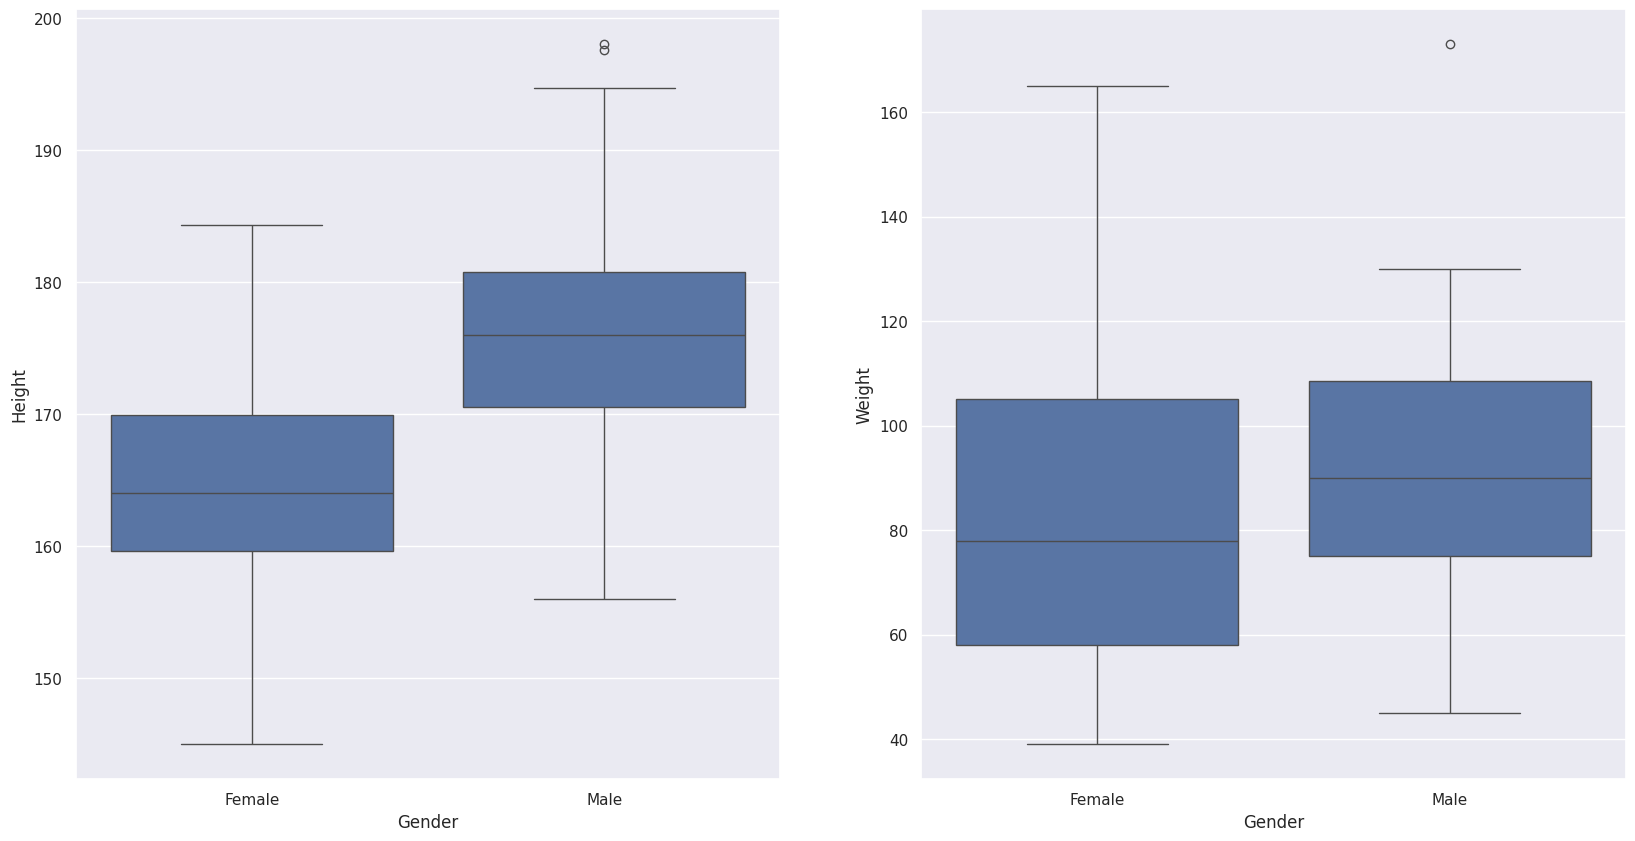

In [15]:
sns.set()
fig = plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
sns.boxplot(x='Gender', y='Height', data=data)
plt.subplot(1, 2, 2)
sns.boxplot(x='Gender', y='Weight', data=data)

## Hubungan Antara Tinggi dan Berat Badan

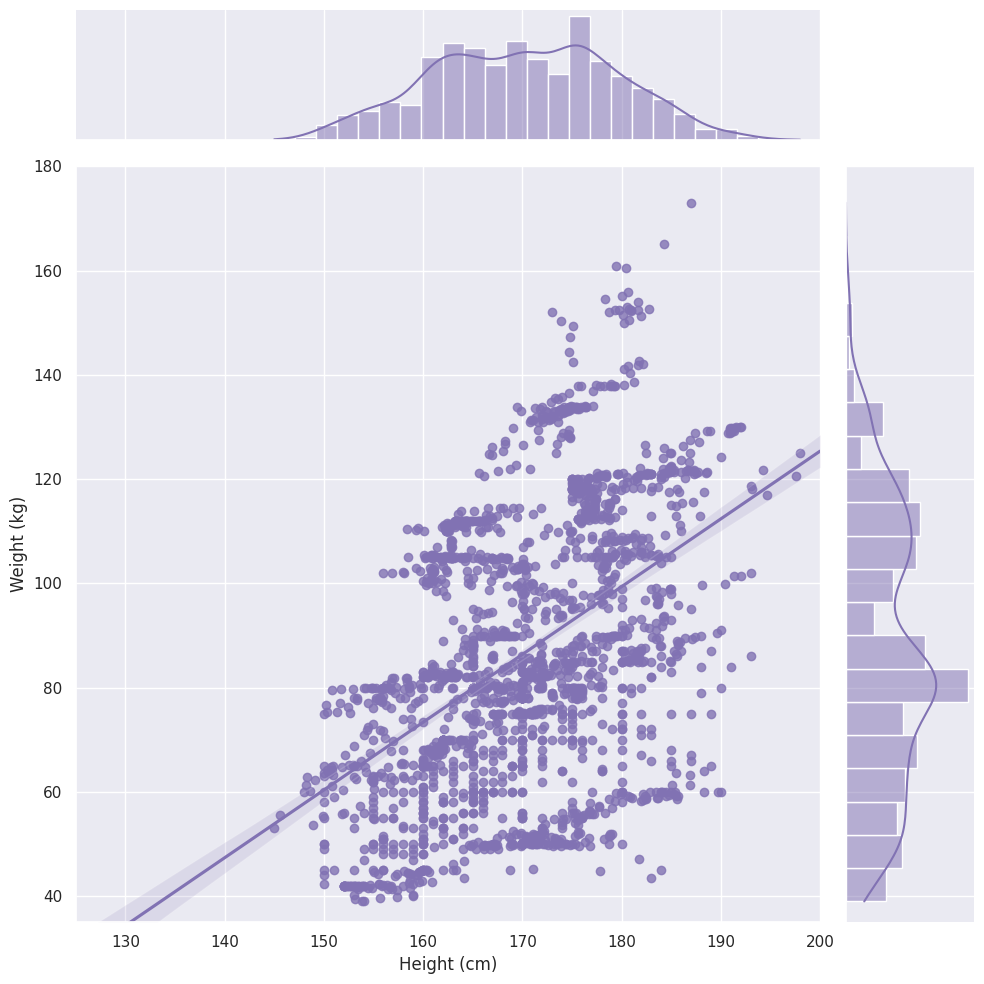

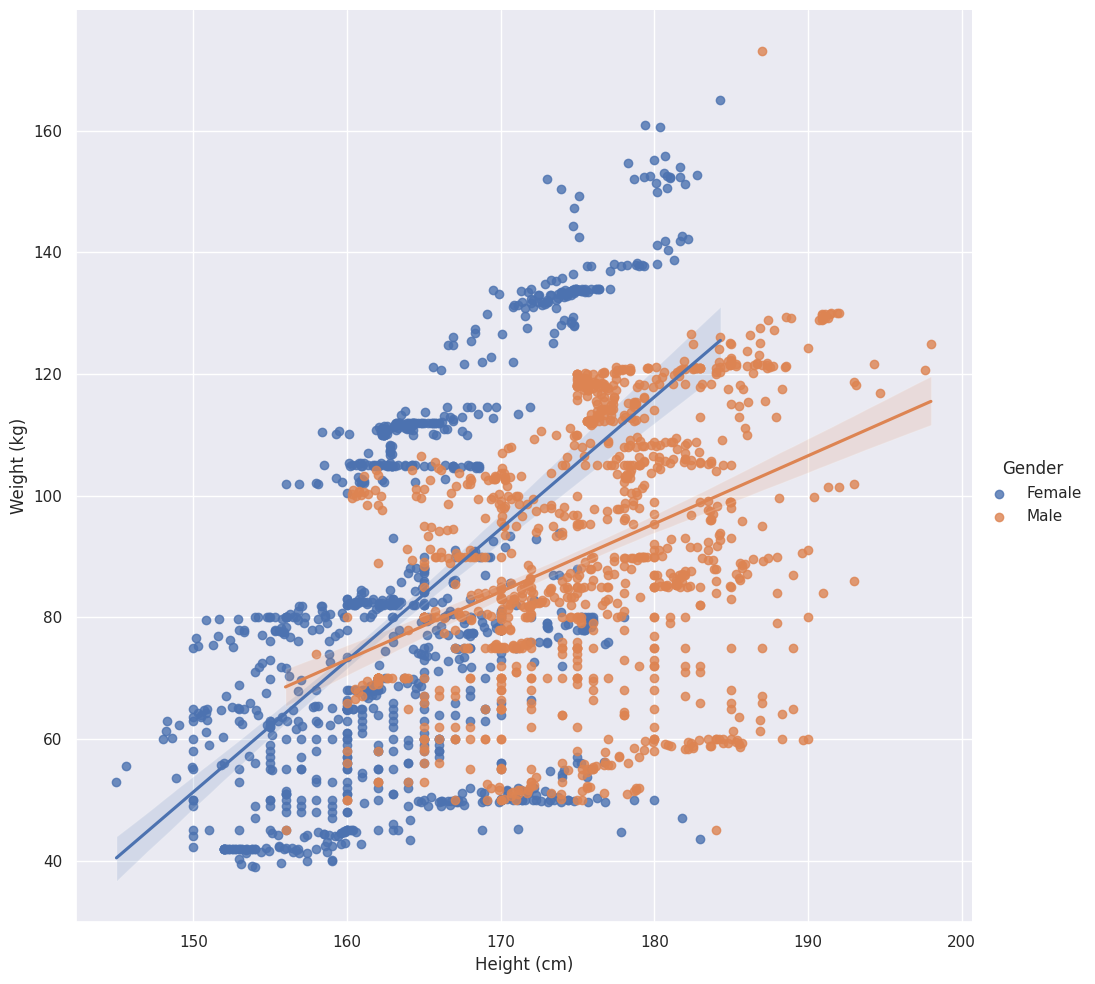

In [16]:
sns.set()
g = sns.jointplot(
    x="Height",  # Nama kolom untuk sumbu x
    y="Weight",  # Nama kolom untuk sumbu y
    data=data,   # Dataset yang digunakan
    kind="reg",  # Jenis plot (regresi)
    truncate=False,
    xlim=(125, 200),  # Batas sumbu x
    ylim=(35, 180),   # Batas sumbu y
    color="m",        # Warna plot
    height=10         # Tinggi plot
)
g.set_axis_labels("Height (cm)", "Weight (kg)")  # Label sumbu

# Plot dengan pemisahan berdasarkan gender
g = sns.lmplot(
    x="Height",       # Nama kolom untuk sumbu x
    y="Weight",       # Nama kolom untuk sumbu y
    hue="Gender",     # Pemisahan berdasarkan gender
    height=10,        # Tinggi plot
    data=data         # Dataset yang digunakan
)
g.set_axis_labels("Height (cm)", "Weight (kg)")  # Label sumbu

Menunjukkan hubungan linier antara tinggi dan berat badan.
Hasilnya:
Plot regresi menunjukkan bahwa semakin tinggi seseorang, semakin berat badannya.
Garis plot pada perempuan lebih curam, menunjukkan variasi berat badan yang lebih besar.

## Analisis Distribusi Status Obesitas

Counter({'Obesity Type I': 351, 'Obesity Type III': 324, 'Obesity Type II': 297, 'Overweight Level I': 290, 'Overweight Level II': 290, 'Normal Weight': 287, 'Insufficient Weight': 272})
Counter({'Obesity Type II': 295, 'Obesity Type I': 195, 'Overweight Level II': 187, 'Normal Weight': 146, 'Overweight Level I': 145, 'Insufficient Weight': 99, 'Obesity Type III': 1})
Counter({'Obesity Type III': 323, 'Insufficient Weight': 173, 'Obesity Type I': 156, 'Overweight Level I': 145, 'Normal Weight': 141, 'Overweight Level II': 103, 'Obesity Type II': 2})


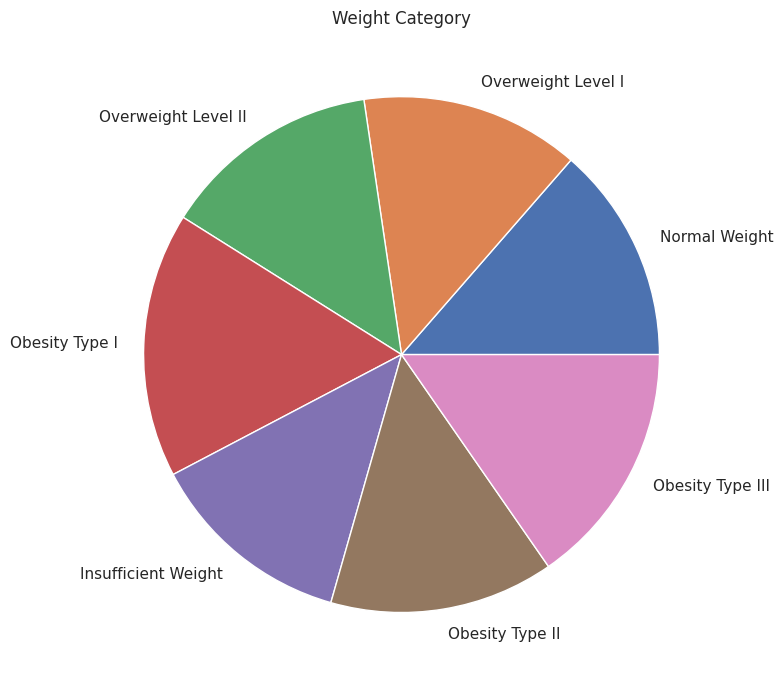

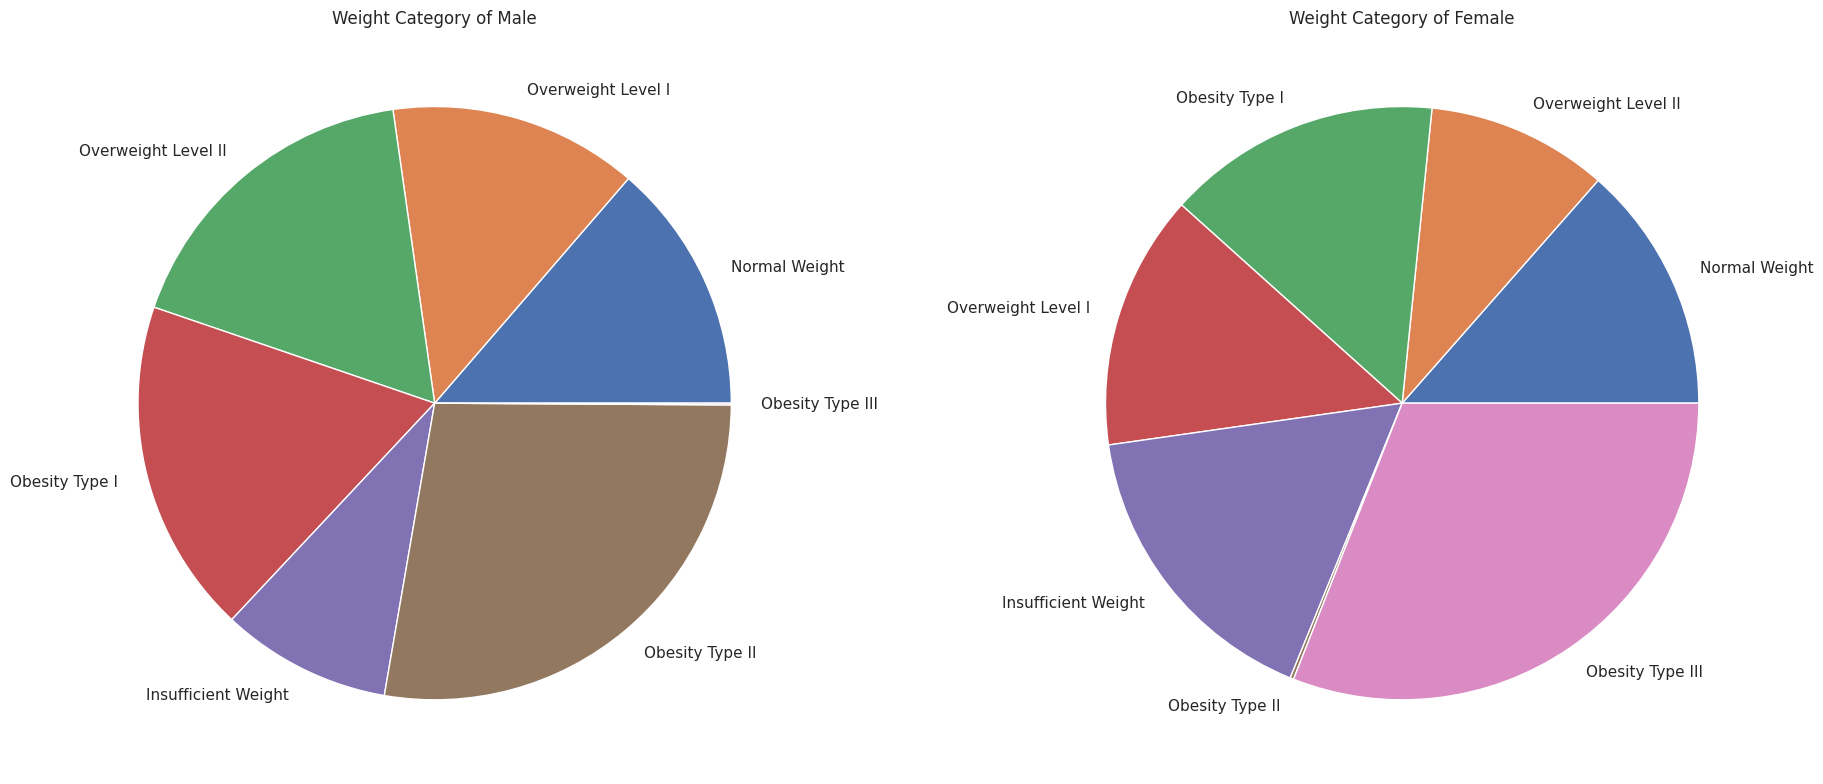

In [17]:
c = Counter(data['Obesity'])
print(c)

fig = plt.figure(figsize=(8,8))
plt.pie([float(c[v]) for v in c], labels=[str(k) for k in c], autopct=None)
plt.title('Weight Category')
plt.tight_layout()

filt = data['Gender'] == 'Male'
c_m = Counter(data.loc[filt, 'Obesity'])
print(c_m)
c_f = Counter(data.loc[~filt, 'Obesity'])
print(c_f)

fig = plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
plt.pie([float(c_m[v]) for v in c_m], labels=[str(k) for k in c_m], autopct=None)
plt.title('Weight Category of Male')
plt.tight_layout()

plt.subplot(1, 2, 2)
plt.pie([float(c_f[v]) for v in c_f], labels=[str(k) for k in c_f], autopct=None)
plt.title('Weight Category of Female')
plt.tight_layout()

Menganalisis distribusi status obesitas secara keseluruhan dan berdasarkan gender.
Hasilnya:
Perempuan memiliki proporsi yang lebih besar untuk kategori Obesity Type III dan Insufficient Weight.
Laki-laki memiliki proporsi yang lebih besar untuk kategori Obesity Type II.

## Visualisasi Kebiasaan Makan dan Aktivitas Fisik

Family History with Overweight ['yes', 'no'] [1726, 385]
Frequent consumption of high caloric food ['yes', 'no'] [1866, 245]
Frequency of consumption of vegetables ['Sometimes', 'Always', 'Never'] [1013, 996, 102]
Number of main meals ['3', '1', '2', '3+'] [1470, 316, 176, 149]
Consumption of food between meals ['Sometimes', 'Frequently', 'Always', 'no'] [1765, 242, 53, 51]
Smoke ['no', 'yes'] [2067, 44]
Consumption of water daily ['Between 1 and 2 L', 'More than 2 L', 'Less than a liter'] [1110, 516, 485]
Calories consumption monitoring ['no', 'yes'] [2015, 96]
Physical activity frequency ['1 or 2 days', 'I do not have', '2 or 4 days', '4 or 5 days'] [776, 720, 496, 119]
Time using technology devices ['0–2 hours', '3–5 hours', 'More than 5 hours'] [952, 915, 244]
Consumption of alcohol ['Sometimes', 'no', 'Frequently', 'Always'] [1401, 639, 70, 1]
Transportation used ['Public Transportation', 'Automobile', 'Walking', 'Motorbike', 'Bike'] [1580, 457, 56, 11, 7]


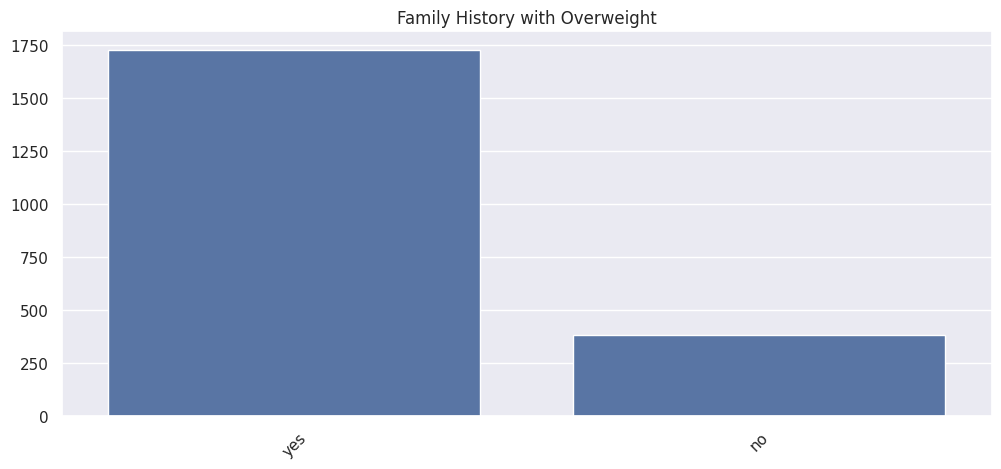

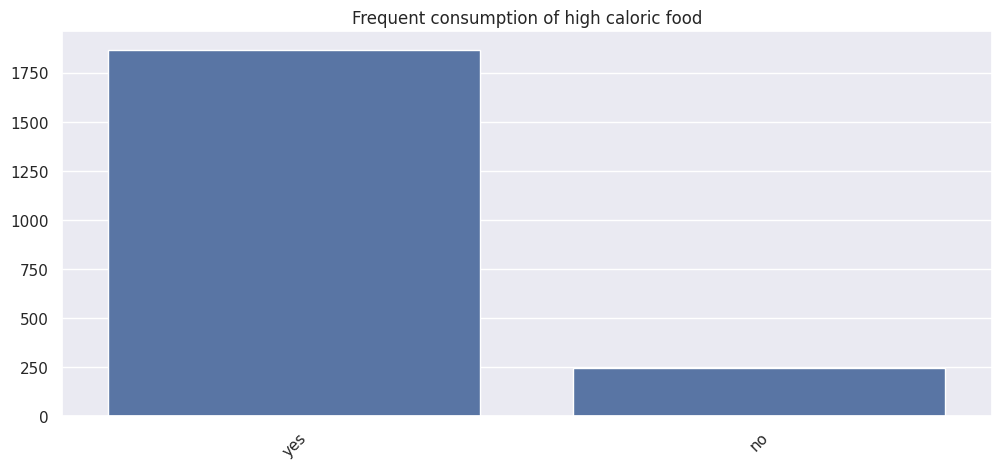

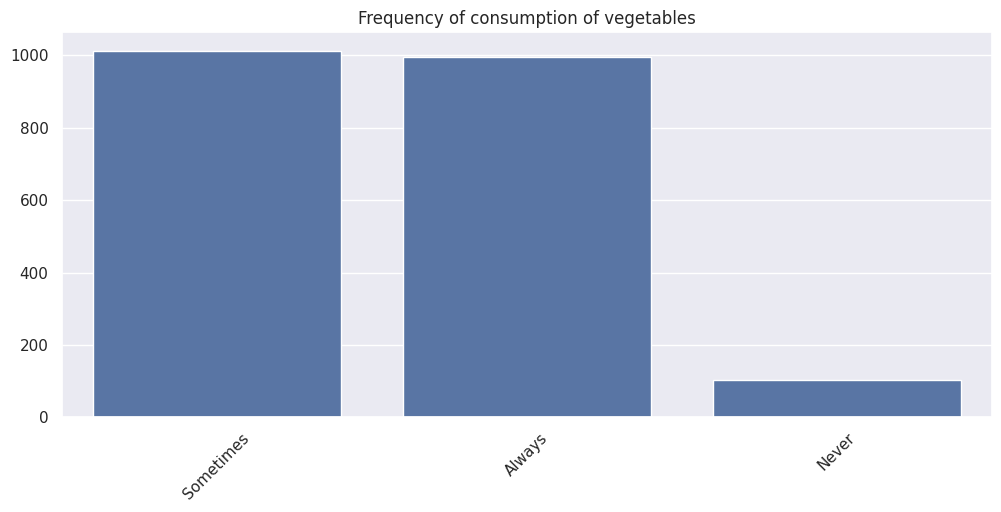

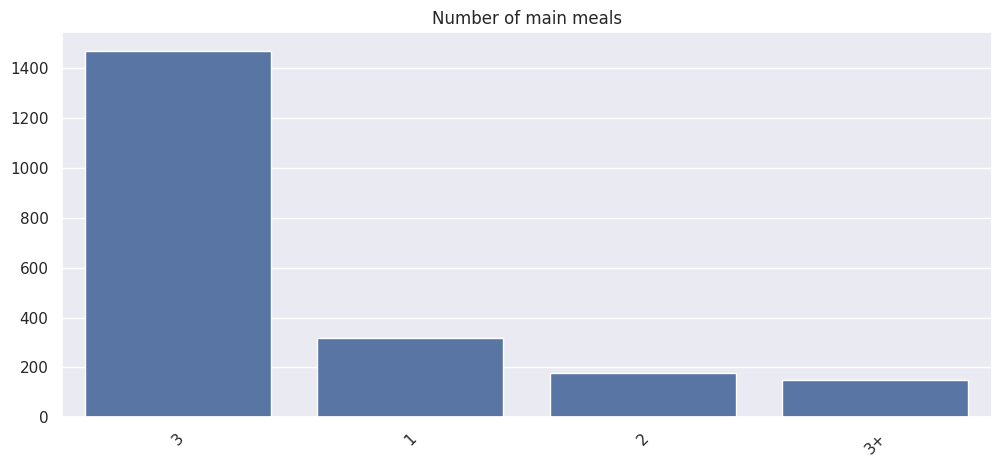

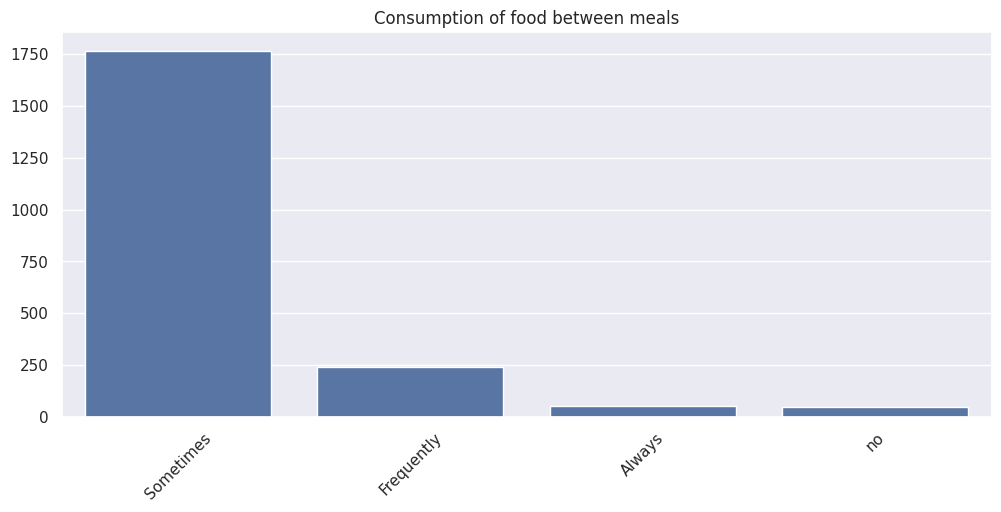

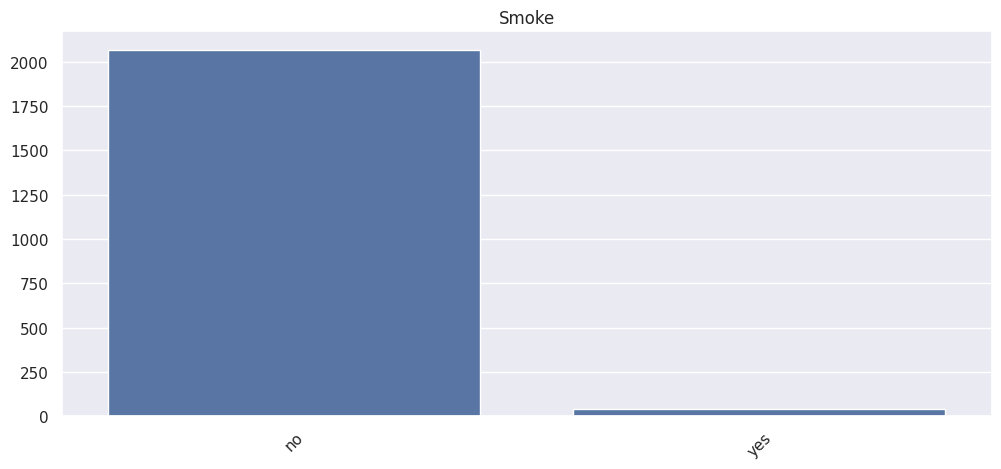

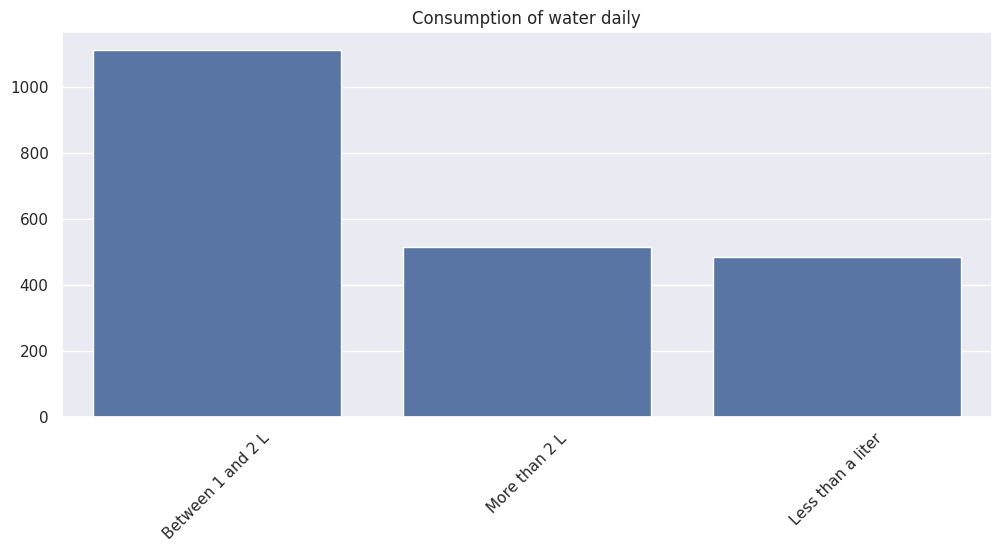

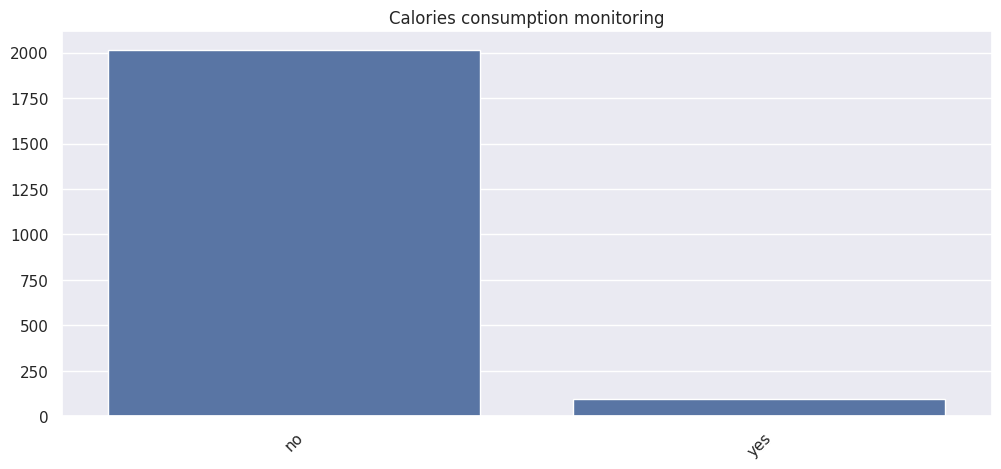

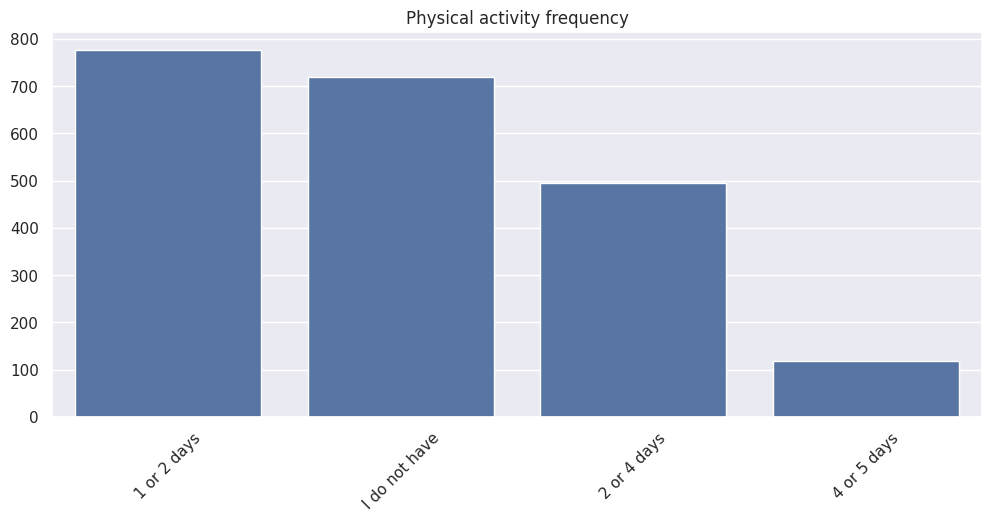

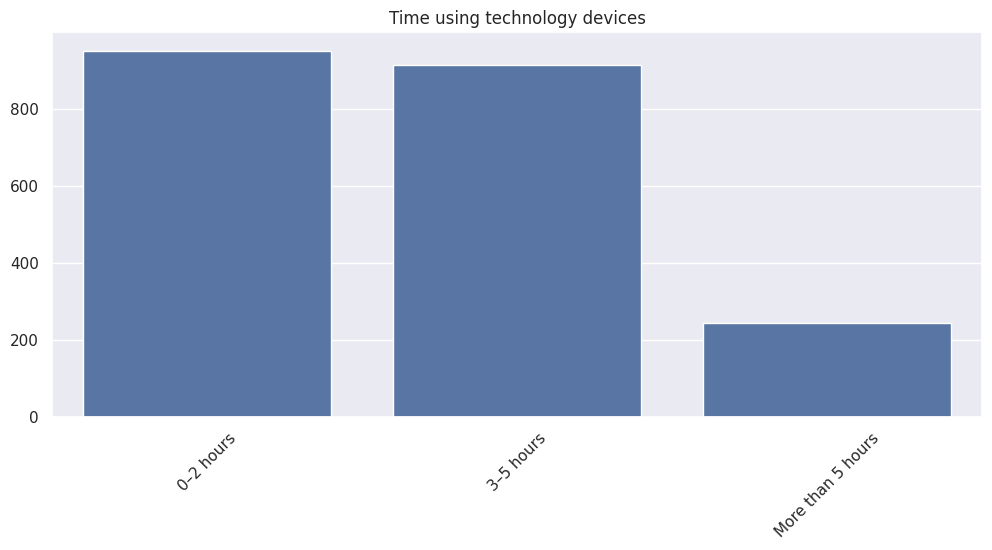

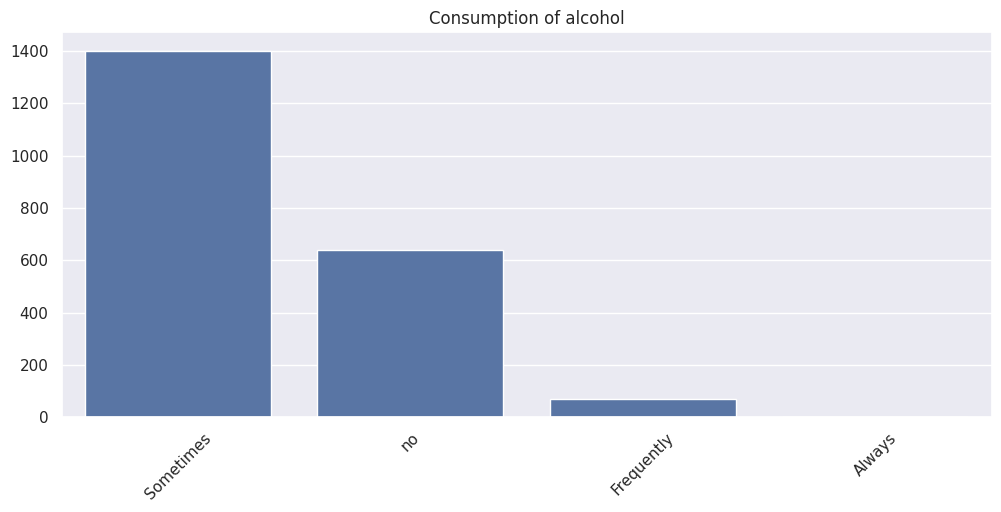

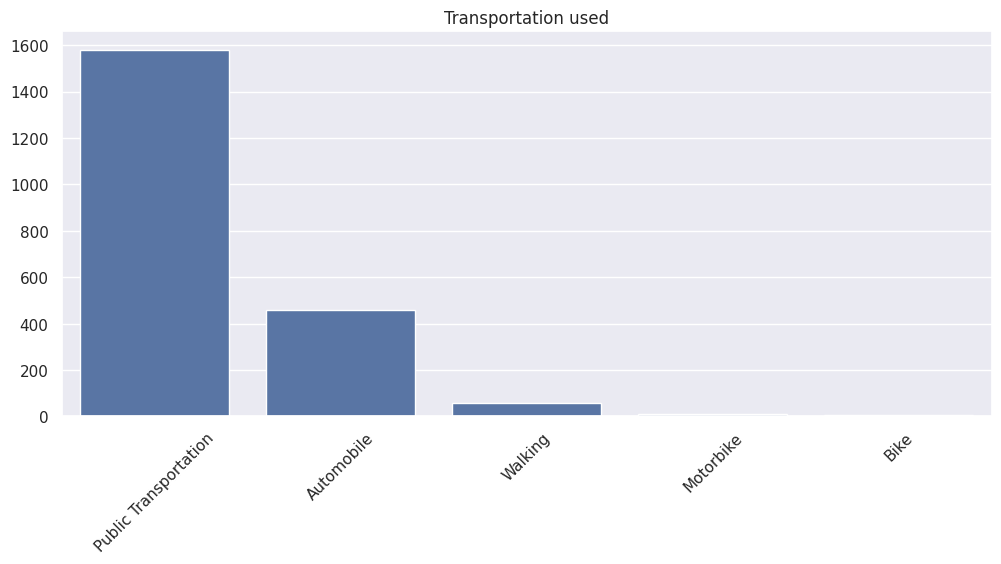

In [18]:
for a in data.columns[4:-1]:
    counts = data[a].value_counts()
    values = counts.index.to_list()
    counts = counts.to_list()

    plt.figure(figsize=(12,5))
    ax = sns.barplot(x=values, y=counts)

    plt.title(a)
    plt.xticks(rotation=45)
    print(a, values, counts)

Memvisualisasikan distribusi variabel kategorikal seperti Family History with Overweight, Frequent consumption of high caloric food, dll.
Hasilnya:
Sebagian besar individu memiliki riwayat keluarga dengan obesitas (yes).
Konsumsi air harian sebagian besar berada pada kategori Between 1 and 2 L.

# **KESIMPULAN EDA:**
* Analisis Distribusi Fitur Numerik: Memahami rentang nilai dan distribusi fitur numerik.
* Pembulatan dan Identifikasi Nilai Unik: Membulatkan nilai numerik dan menampilkan nilai unik.
* Mapping Nilai Kategorikal: Mengganti nilai numerik dengan label kategorikal yang lebih deskriptif.
* Visualisasi Tinggi dan Berat Badan: Membandingkan distribusi tinggi dan berat badan berdasarkan gender.
* Hubungan Tinggi dan Berat Badan: Menunjukkan hubungan linier antara tinggi dan berat badan.
* Analisis Status Obesitas: Memahami distribusi status obesitas secara keseluruhan dan berdasarkan gender.
* Visualisasi Kebiasaan Makan dan Aktivitas Fisik: Memahami pola kebiasaan makan dan aktivitas fisik.


# **5. Data Preparation**

Mempersiapkan dataset agar siap digunakan untuk pemodelan machine learning. Ini mencakup penanganan missing values, encoding variabel kategorikal, feature scaling, dan split data.

## Penanganan Missing Values

Memastikan tidak ada nilai kosong dalam dataset yang dapat memengaruhi performa model.

In [19]:
# Cek missing values
print(data.isnull().sum())

Gender                                       0
Age                                          0
Height                                       0
Weight                                       0
Family History with Overweight               0
Frequent consumption of high caloric food    0
Frequency of consumption of vegetables       0
Number of main meals                         0
Consumption of food between meals            0
Smoke                                        0
Consumption of water daily                   0
Calories consumption monitoring              0
Physical activity frequency                  0
Time using technology devices                0
Consumption of alcohol                       0
Transportation used                          0
Obesity                                      0
dtype: int64


In [23]:
data.head()

,Gender,Age,Height,Weight,Family History with Overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation used,Obesity
0,Female,21.0,162.0,64.0,yes,no,Sometimes,3,Sometimes,no,Between 1 and 2 L,no,I do not have,3–5 hours,no,Public Transportation,Normal Weight
1,Female,21.0,152.0,56.0,yes,no,Always,3,Sometimes,yes,More than 2 L,yes,4 or 5 days,0–2 hours,Sometimes,Public Transportation,Normal Weight
2,Male,23.0,180.0,77.0,yes,no,Sometimes,3,Sometimes,no,Between 1 and 2 L,no,2 or 4 days,3–5 hours,Frequently,Public Transportation,Normal Weight
3,Male,27.0,180.0,87.0,no,no,Always,3,Sometimes,no,Between 1 and 2 L,no,2 or 4 days,0–2 hours,Frequently,Walking,Overweight Level I
4,Male,22.0,178.0,89.8,no,no,Sometimes,1,Sometimes,no,Between 1 and 2 L,no,I do not have,0–2 hours,Sometimes,Public Transportation,Overweight Level II


## Encoding Variabel Kategorikal

Tujuan utama dari langkah ini adalah untuk mempersiapkan dataset agar dapat diproses oleh algoritma machine learning, karena sebagian besar algoritma hanya dapat bekerja dengan data numerik.

In [24]:
# Mapping untuk kolom 'yes/no'
new_yesno = {'yes': 1, 'no': 0}
columns_to_encode = [
    'Family History with Overweight',
    'Frequent consumption of high caloric food',
    'Smoke',
    'Calories consumption monitoring'
]

for col in columns_to_encode:
    data[col] = data[col].replace(new_yesno)

# Mapping manual untuk kolom lainnya
mapping_gender = {'Female': 0, 'Male': 1}
mapping_vegetables = {'Never': 0, 'Sometimes': 1, 'Always': 2}
mapping_meals = {'1': 1, '2': 2, '3': 3, '3+': 4}
mapping_water = {
    'Less than a liter': 0,
    'Between 1 and 2 L': 1,
    'More than 2 L': 2
}
mapping_physical_activity = {
    'I do not have': 0,
    '1 or 2 days': 1,
    '2 or 4 days': 2,
    '4 or 5 days': 3
}
mapping_tech_usage = {
    '0–2 hours': 0,
    '3–5 hours': 1,
    'More than 5 hours': 2
}
mapping_alcohol = {
    'no': 0,
    'Sometimes': 1,
    'Frequently': 2,
    'Always': 3
}

# Apply mapping
data['Gender'] = data['Gender'].replace(mapping_gender)
data['Frequency of consumption of vegetables'] = data['Frequency of consumption of vegetables'].replace(mapping_vegetables)
data['Number of main meals'] = data['Number of main meals'].replace(mapping_meals)
data['Consumption of water daily'] = data['Consumption of water daily'].replace(mapping_water)
data['Physical activity frequency'] = data['Physical activity frequency'].replace(mapping_physical_activity)
data['Time using technology devices'] = data['Time using technology devices'].replace(mapping_tech_usage)
data['Consumption of alcohol'] = data['Consumption of alcohol'].replace(mapping_alcohol)

# One-Hot Encoding untuk kolom 'Transportation used' dan 'Consumption of food between meals'
data = pd.get_dummies(data, columns=['Transportation used', 'Consumption of food between meals'], drop_first=True)

# Encode target variable 'Obesity' menggunakan LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Obesity'] = label_encoder.fit_transform(data['Obesity'])

<ipython-input-24-21208a898958>:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[col] = data[col].replace(new_yesno)
<ipython-input-24-21208a898958>:41: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Gender'] = data['Gender'].replace(mapping_gender)
<ipython-input-24-21208a898958>:42: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('f

In [27]:
# Tampilkan mapping antara kategori asli dan nilai numerik
print("Mapping LabelEncoder untuk 'Obesity':")
for index, category in enumerate(label_encoder.classes_):
    print(f"{index} -> {category}")

Mapping LabelEncoder untuk 'Obesity':
0 -> Insufficient Weight
1 -> Normal Weight
2 -> Obesity Type I
3 -> Obesity Type II
4 -> Obesity Type III
5 -> Overweight Level I
6 -> Overweight Level II


In [25]:
data

,Gender,Age,Height,Weight,Family History with Overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Smoke,Consumption of water daily,...,Time using technology devices,Consumption of alcohol,Obesity,Transportation used_Bike,Transportation used_Motorbike,Transportation used_Public Transportation,Transportation used_Walking,Consumption of food between meals_Frequently,Consumption of food between meals_Sometimes,Consumption of food between meals_no
0,0,21.0,162.0,64.0,1,0,1,3,0,1,...,1,0,1,False,False,True,False,False,True,False
1,0,21.0,152.0,56.0,1,0,2,3,1,2,...,0,1,1,False,False,True,False,False,True,False
2,1,23.0,180.0,77.0,1,0,1,3,0,1,...,1,2,1,False,False,True,False,False,True,False
3,1,27.0,180.0,87.0,0,0,2,3,0,1,...,0,2,5,False,False,False,True,False,True,False
4,1,22.0,178.0,89.8,0,0,1,1,0,1,...,0,1,6,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,21.0,171.1,131.4,1,1,2,3,0,1,...,1,1,4,False,False,True,False,False,True,False
2107,0,22.0,174.9,133.7,1,1,2,3,0,1,...,1,1,4,False,False,True,False,False,True,False
2108,0,22.5,175.2,133.7,1,1,2,3,0,1,...,1,1,4,False,False,True,False,False,True,False
2109,0,24.4,173.9,133.3,1,1,2,3,0,2,...,1,1,4,False,False,True,False,False,True,False


* Kolom biner (Yes/No): Kolom-kolom seperti Family History with Overweight, Frequent consumption of high caloric food, Smoke, dan Calories consumption monitoring memiliki dua nilai unik (yes dan no).
* Tujuan: Mengganti nilai kategorikal (yes dan no) dengan nilai numerik (1 dan 0) untuk menyederhanakan data.
* Manfaat: Algoritma machine learning tidak dapat memproses teks secara langsung, jadi konversi ini diperlukan. Selain itu, nilai biner lebih efisien dalam komputasi.

* Kolom dengan lebih dari dua kategori: Kolom-kolom seperti Gender, Frequency of consumption of vegetables, Number of main meals, dll., memiliki lebih dari dua kategori.
* Tujuan: Mengganti nilai-nilai kategorikal dengan nilai numerik berdasarkan urutan logis atau tingkatannya (ordinal encoding).
* Manfaat:
Ordinal Encoding: Nilai numerik mencerminkan urutan logis antara kategori. Misalnya, Never < Sometimes < Always diwakili sebagai 0, 1, 2.
Efisiensi Komputasi: Algoritma machine learning lebih mudah memproses angka daripada teks.

* Kolom dengan banyak kategori tanpa urutan logis: Kolom seperti Transportation used dan Consumption of food between meals memiliki banyak kategori (misalnya, Public Transportation, Walking, Bike, dll.) yang tidak memiliki urutan logis.
* Tujuan: Menggunakan One-Hot Encoding untuk membuat kolom baru untuk setiap kategori.
* Manfaat:
Menghindari Masalah Ordinalitas: One-hot encoding menghindari asumsi bahwa ada hubungan ordinal antara kategori (misalnya, Public Transportation tidak "lebih besar" dari Walking).
Drop First: Parameter drop_first=True digunakan untuk menghindari dummy variable trap , yaitu masalah multikolinearitas yang terjadi ketika satu variabel dapat diprediksi dari variabel lainnya.

* Target Variable (Obesity): Kolom target Obesity memiliki beberapa kategori seperti Normal Weight, Overweight Level I, Obesity Type III, dll.
* Tujuan: Mengubah nilai-nilai kategorikal menjadi numerik menggunakan LabelEncoder.
* Manfaat:
Klasifikasi Machine Learning: Algoritma klasifikasi membutuhkan target variable dalam bentuk numerik untuk melakukan prediksi.
Kepraktisan: LabelEncoder memberikan nilai numerik unik untuk setiap kategori (misalnya, Normal Weight = 0, Overweight Level I = 1, dst.).

## Feature Scaling

Feature Selection adalah proses memilih subset fitur (variabel) yang paling relevan dari dataset untuk digunakan dalam pemodelan machine learning. Tujuan utamanya adalah:

Mengurangi dimensi data untuk meningkatkan efisiensi komputasi.
Menghilangkan fitur yang tidak relevan atau redundan, yang dapat menyebabkan noise dalam model.
Meningkatkan performa model dengan fokus pada fitur yang memiliki hubungan kuat dengan variabel target.

ANOVA F-test adalah metode statistik yang digunakan untuk mengevaluasi hubungan antara setiap fitur numerik dengan variabel target kategorikal. Alasan penggunaannya adalah:

Statistik F: Nilai F mengukur seberapa besar variasi antar kelompok (kategori target) dibandingkan dengan variasi di dalam kelompok. Semakin tinggi nilai F, semakin kuat hubungan antara fitur tersebut dengan target.
P-value: Mengukur signifikansi statistik dari hubungan tersebut. Fitur dengan p-value rendah (<0.05) dianggap memiliki hubungan yang signifikan dengan target.

Memilih fitur yang paling relevan berdasarkan metode statistik seperti ANOVA F-test.
Hasilnya:
Fitur-fitur dengan korelasi tinggi terhadap target variabel (Obesity) akan dipilih.

In [29]:
# Pilih fitur terbaik berdasarkan ANOVA F-test
X = data.drop('Obesity', axis=1)  # Features
y = data['Obesity']  # Target

# Feature selection menggunakan SelectKBest
selector = SelectKBest(score_func=f_classif, k=10)  # Pilih 10 fitur terbaik
X_selected = selector.fit_transform(X, y)

# Tampilkan fitur yang dipilih
selected_features = X.columns[selector.get_support()]
print("Fitur yang dipilih:", selected_features)

Fitur yang dipilih: Index(['Gender', 'Age', 'Height', 'Weight', 'Family History with Overweight',
       'Frequent consumption of high caloric food',
       'Frequency of consumption of vegetables', 'Consumption of alcohol',
       'Consumption of food between meals_Frequently',
       'Consumption of food between meals_Sometimes'],
      dtype='object')


Penjelasan Fitur yang Dipilih:
Berikut adalah interpretasi dari fitur-fitur yang dipilih:

1. Gender:
Variabel ini mungkin memiliki hubungan dengan obesitas karena perbedaan metabolisme antara laki-laki dan perempuan.
2. Age:
Usia dapat memengaruhi risiko obesitas karena perubahan gaya hidup dan metabolisme seiring bertambahnya usia.
3. Height (Tinggi Badan):
Tinggi badan berkorelasi dengan berat badan dan indeks massa tubuh (BMI), yang merupakan faktor penting dalam klasifikasi obesitas.
4. Weight (Berat Badan):
Berat badan adalah indikator langsung dari status obesitas, sehingga wajar jika fitur ini dipilih.
5. Family History with Overweight:
Riwayat keluarga dengan kelebihan berat badan dapat menjadi prediktor kuat untuk risiko obesitas karena faktor genetik.
6. Frequent consumption of high caloric food:
Konsumsi makanan tinggi kalori secara rutin dapat meningkatkan risiko obesitas.
7. Frequency of consumption of vegetables:
Konsumsi sayuran sering dikaitkan dengan pola makan sehat, yang dapat memengaruhi status obesitas.
8. Consumption of alcohol:
Konsumsi alkohol dapat berkontribusi pada asupan kalori tambahan, yang berpotensi memengaruhi status obesitas.
9. Consumption of food between meals_Frequently:
Makan di antara waktu makan utama secara rutin dapat meningkatkan asupan kalori harian.
10. Consumption of food between meals_Sometimes:
Pola makan ini mungkin memiliki hubungan moderat dengan risiko obesitas dibandingkan dengan "Frequently" atau "Never."

Fitur-fitur yang dipilih memiliki hubungan statistik yang signifikan dengan variabel target (Obesity) berdasarkan ANOVA F-test. Alasan spesifiknya adalah:

Variabel Numerik: Fitur seperti Age, Height, dan Weight memiliki hubungan linier yang jelas dengan status obesitas.
Variabel Kategorikal: Fitur seperti Family History with Overweight dan Frequent consumption of high caloric food mencerminkan faktor risiko yang kuat untuk obesitas.
One-Hot Encoded Features: Fitur seperti Consumption of food between meals_Frequently dan Consumption of food between meals_Sometimes menunjukkan pola kebiasaan makan yang relevan dengan status obesitas.

## Split Dataset

Membagi dataset menjadi training set (80%) dan testing set (20%).
Hasilnya:
X_train dan y_train digunakan untuk melatih model.
X_test dan y_test digunakan untuk evaluasi model.

In [30]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# **6. Modeling**

Melatih model menggunakan algoritma seperti RandomForestClassifier, GradientBoostingClassifier, dan KNeighborsClassifier.
Hasilnya:
Evaluasi model menggunakan classification report dan confusion matrix.

* RandomForestClassifier dipilih karena kemampuannya menangani dataset dengan fitur campuran (numerik dan kategorikal) serta hubungan non-linear antar variabel, yang sering ditemui dalam kasus seperti ini. Random Forest juga stabil terhadap noise dan outliers, sehingga cocok untuk dataset dengan banyak fitur setelah tahap feature selection.
* GradientBoostingClassifier digunakan karena algoritma ini membangun model secara iteratif dengan memperbaiki kesalahan dari model sebelumnya, membuatnya sangat efektif dalam menangkap pola kompleks dalam data. Algoritma ini juga lebih sensitif terhadap ketidakseimbangan kelas minoritas, seperti beberapa kelas obesitas yang memiliki jumlah sampel lebih sedikit.
* KNeighborsClassifier dipilih karena sifatnya yang sederhana namun efektif untuk dataset yang telah melalui preprocessing seperti scaling. KNN bekerja berdasarkan jarak antar titik data, sehingga sangat bergantung pada kualitas preprocessing, yang dalam hal ini sudah dilakukan dengan baik melalui normalisasi fitur.

=== RandomForest ===
              precision    recall  f1-score   support

           0       0.95      0.96      0.96        56
           1       0.86      0.87      0.86        62
           2       0.99      0.94      0.96        78
           3       0.98      0.98      0.98        58
           4       1.00      1.00      1.00        63
           5       0.87      0.86      0.86        56
           6       0.92      0.98      0.95        50

    accuracy                           0.94       423
   macro avg       0.94      0.94      0.94       423
weighted avg       0.94      0.94      0.94       423



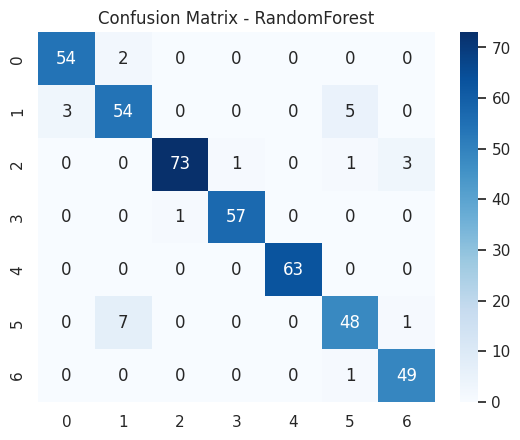

=== GradientBoosting ===
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        56
           1       0.92      0.89      0.90        62
           2       0.97      0.90      0.93        78
           3       0.92      0.98      0.95        58
           4       1.00      1.00      1.00        63
           5       0.91      0.95      0.93        56
           6       0.96      0.98      0.97        50

    accuracy                           0.95       423
   macro avg       0.94      0.95      0.95       423
weighted avg       0.95      0.95      0.95       423



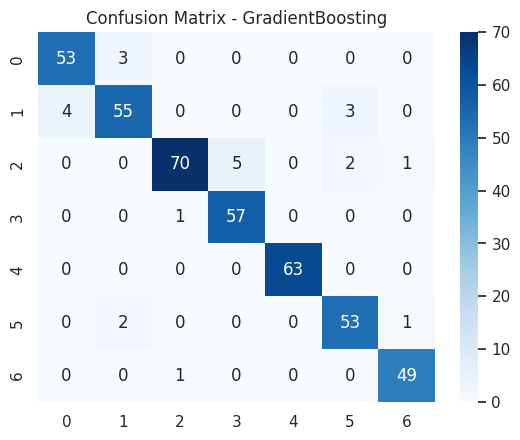

=== KNeighbors ===
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        56
           1       0.98      0.81      0.88        62
           2       1.00      0.99      0.99        78
           3       0.98      0.97      0.97        58
           4       0.97      1.00      0.98        63
           5       0.90      0.93      0.91        56
           6       0.94      1.00      0.97        50

    accuracy                           0.96       423
   macro avg       0.95      0.96      0.95       423
weighted avg       0.96      0.96      0.95       423



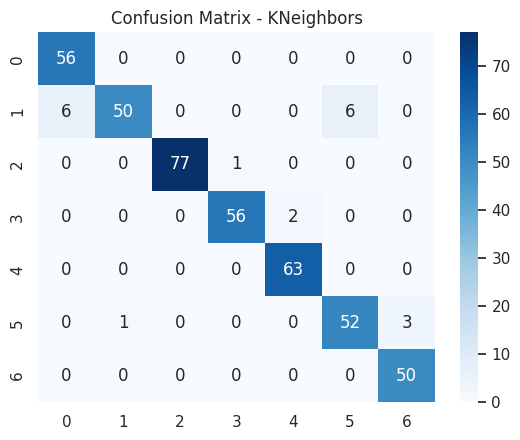

In [33]:
# Inisialisasi model
models = {
    "RandomForest": RandomForestClassifier(random_state=42),
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
    "KNeighbors": KNeighborsClassifier()
}

# Train dan evaluasi model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"=== {name} ===")
    print(classification_report(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

# **7. Evaluation**

1. Akurasi (Accuracy)
* Definisi: Akurasi adalah proporsi prediksi yang benar dibandingkan dengan total jumlah prediksi.

* Rumus: $$
\text{Accuracy} = \frac{\text{True Positives} + \text{True Negatives}}{\text{Total Predictions}}
$$

* Interpretasi:
Akurasi mengukur seberapa sering model membuat prediksi yang benar secara keseluruhan. Misalnya, jika akurasi adalah 95%, itu berarti 95% dari semua prediksi yang dibuat oleh model adalah benar.

2. Precision
* Definisi:
Precision adalah proporsi prediksi positif yang benar dibandingkan dengan total prediksi positif.

* Rumus: $$
\text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}
$$

* Interpretasi:
Precision mengukur seberapa "percaya diri" model dalam memprediksi suatu kelas tertentu. Misalnya, jika precision untuk kelas Obesity Type III adalah 1.00, itu berarti setiap kali model memprediksi kelas ini, prediksinya selalu benar.

3. Recall (Sensitivitas)
* Definisi:
Recall adalah proporsi kasus positif aktual yang berhasil diidentifikasi oleh model.

* Rumus: $$
\text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
$$

* Interpretasi:
Recall mengukur kemampuan model untuk mengidentifikasi semua kasus positif. Misalnya, jika recall untuk kelas Insufficient Weight adalah 0.95, itu berarti model berhasil mengidentifikasi 95% dari semua kasus Insufficient Weight.

4. F1-Score
Definisi:
* F1-Score adalah rata-rata harmonik antara precision dan recall.

* Rumus: $$
\text{F1-Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

* Interpretasi:
F1-Score memberikan gambaran seimbang antara precision dan recall. Misalnya, jika F1-Score untuk kelas Overweight Level I adalah 0.93, itu berarti model memiliki keseimbangan yang baik antara precision dan recall untuk kelas tersebut.

5. Macro Average
* Definisi:
Macro average adalah rata-rata dari precision, recall, dan f1-score untuk semua kelas tanpa mempertimbangkan distribusi kelas.

* Rumus: $$
\text{Macro Avg} = \frac{1}{N} \sum_{i=1}^{N} \text{Metric}_i
$$

* Interpretasi:
Macro avg memberikan gambaran umum tentang performa model di semua kelas, terlepas dari ukuran kelas. Misalnya, jika macro avg precision adalah 0.94, itu berarti rata-rata precision untuk semua kelas adalah 94%.

6. Weighted Average
* Definisi:
Weighted average adalah rata-rata dari precision, recall, dan f1-score untuk semua kelas dengan mempertimbangkan distribusi kelas.

* Rumus: $$
\text{Weighted Avg} = \frac{\sum_{i=1}^{N} (\text{Support}_i \cdot \text{Metric}_i)}{\sum_{i=1}^{N} \text{Support}_i}
$$

* Interpretasi:
Weighted avg lebih fokus pada kelas-kelas dengan jumlah sampel yang lebih besar. Misalnya, jika weighted avg recall adalah 0.95, itu berarti model memiliki performa recall yang baik untuk kelas-kelas mayoritas.

Membandingkan performa model berdasarkan akurasi.
Hasilnya:
Model dengan akurasi tertinggi dipilih sebagai model terbaik.

In [36]:
# Bandingkan hasil model
results = {}
for name, model in models.items():
    y_pred = model.predict(X_test)

    # Ambil classification report sebagai dictionary
    report = classification_report(y_test, y_pred, output_dict=True)

    # Simpan akurasi, precision, recall, f1-score, dan macro avg
    results[name] = {
        'Accuracy': report['accuracy'],
        'Precision (Macro Avg)': report['macro avg']['precision'],
        'Recall (Macro Avg)': report['macro avg']['recall'],
        'F1-Score (Macro Avg)': report['macro avg']['f1-score']
    }

# Tampilkan hasil dalam bentuk DataFrame
results_df = pd.DataFrame(results).T
print(results_df)

                  Accuracy  Precision (Macro Avg)  Recall (Macro Avg)  \
RandomForest      0.940898               0.938716            0.941579   
GradientBoosting  0.945626               0.944664            0.948593   
KNeighbors        0.955083               0.953608            0.955389   

                  F1-Score (Macro Avg)  
RandomForest                  0.939908  
GradientBoosting              0.946164  
KNeighbors                    0.952728  


In [35]:
# Pilih model terbaik
best_model = results_df['Accuracy'].idxmax()
print(f"Model terbaik berdasarkan akurasi: {best_model}")

Model terbaik berdasarkan akurasi: KNeighbors
